In [40]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random
from tensorflow.keras import layers
import pandas
import sklearn
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.inspection import DecisionBoundaryDisplay
import seaborn as sns
import numpy as np

In [26]:
# Dataprep

In [27]:
df = pandas.read_csv('data_and_notebook_A3/artificial.csv')
df = df.dropna()
print(df)

     435.05  335.37  0
0    337.22  353.22  0
1    443.71  314.01  0
2    524.15  258.82  0
3    372.59  312.05  0
4    371.75  329.83  0
..      ...     ... ..
365  257.82  324.45  1
366  281.85  305.74  1
367  226.59  329.94  1
368  161.05  246.36  1
369  198.65  431.71  1

[370 rows x 3 columns]


In [34]:
X = df[['435.05', '335.37']]
y = df['0']
X['435.05'].head()

0    337.22
1    443.71
2    524.15
3    372.59
4    371.75
Name: 435.05, dtype: float64

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#X_train.head()
X_train['435.05']

25     346.900
86     465.630
294    316.080
199    211.950
249    306.010
        ...   
45     444.420
63     478.240
133     70.599
253    330.930
5      395.550
Name: 435.05, Length: 296, dtype: float64

<AxesSubplot:xlabel='435.05', ylabel='335.37'>

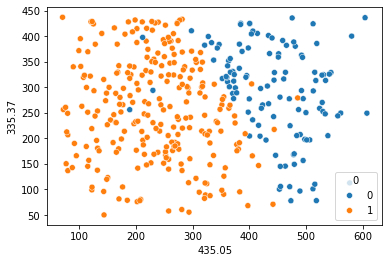

In [30]:
sns.scatterplot(x=df['435.05'], y=df['335.37'], hue='0', data=df)

In [31]:
# Training model

In [32]:
clf = DecisionTreeClassifier(max_depth=3)
clf_fit = clf.fit(X, y)
predictions = clf.predict(X)
print(accuracy_score(y, predictions))

0.9702702702702702


In [ ]:
# Decision boundary

In [35]:
# define bounds of the domain
min1, max1 = X['435.05'].min()-1, X['435.05'].max()+1
min2, max2 = X['335.37'].min()-1, X['335.37'].max()+1

In [43]:
# define the x and y scale
#np.arange()
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)

In [45]:
# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)

In [46]:
# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

In [48]:
# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))

In [55]:
predictions = clf.predict(grid)

/home/kalle/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [56]:
# reshape the predictions back into a grid
zz = predictions.reshape(xx.shape)

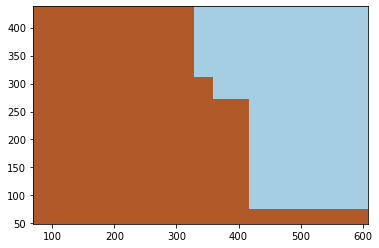

In [58]:
# plot the grid of x, y and z values as a surface
plt.contourf(xx, yy, zz, cmap='Paired')